In [1]:
import pandas as pd

In [ ]:
ogDf = pd.read_csv('lineplot_data.csv')
newDf = pd.read_csv('dataWithState.csv')

In [16]:
ogDf

,year,density
0,2000.0,0.523721
1,2001.0,0.527847
2,2002.0,0.517889
3,2003.0,0.537295
4,2004.0,0.552996
5,2005.0,0.568761
6,2006.0,0.535226
7,2007.0,0.558366
8,2008.0,0.551289
9,2009.0,0.555143


In [18]:
newDf

,year,state,pixel_count,sum_mapped_evi,density
0,2000,AL,2395,65629.0,0.421577
1,2000,AR,2773,78781.0,0.437077
2,2000,AZ,6260,-169732.0,-0.417134
3,2000,CA,8287,-79331.0,-0.147276
4,2000,CO,6232,-39121.0,-0.096576
...,...,...,...,...,...
1195,2024,VT,803,35378.0,0.677804
1196,2024,WA,5788,55401.0,0.147257
1197,2024,WI,4477,155278.0,0.533592
1198,2024,WV,1740,75680.0,0.669142


In [21]:
us_density_by_year = newDf.groupby('year').apply(
    lambda group: group['sum_mapped_evi'].sum() / (65 * group['pixel_count'].sum())
).reset_index(name='us_density')
us_density_by_year['normalized_density'] = (us_density_by_year.us_density + 1)/2
us_density_by_year

C:\Users\Ricky\AppData\Local\Temp\ipykernel_1308\1841467984.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  us_density_by_year = newDf.groupby('year').apply(


,year,us_density,normalized_density
0,2000,0.127126,0.563563
1,2001,0.122517,0.561259
2,2002,0.108255,0.554128
3,2003,0.133031,0.566515
4,2004,0.150676,0.575338
5,2005,0.167996,0.583998
6,2006,0.126267,0.563133
7,2007,0.156112,0.578056
8,2008,0.140951,0.570475
9,2009,0.155092,0.577546


<Axes: xlabel='year'>

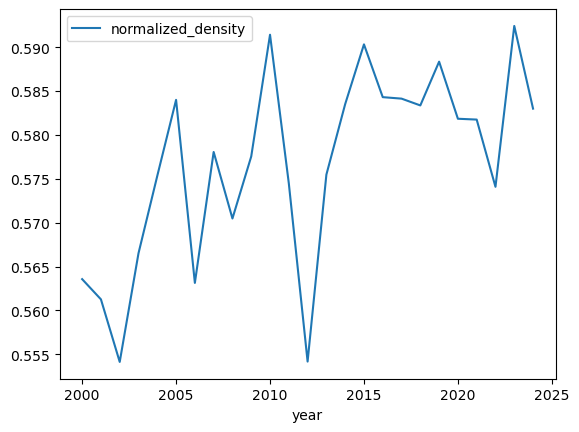

In [22]:
us_density_by_year.plot(x='year', y='normalized_density', kind='line')

<Axes: xlabel='year'>

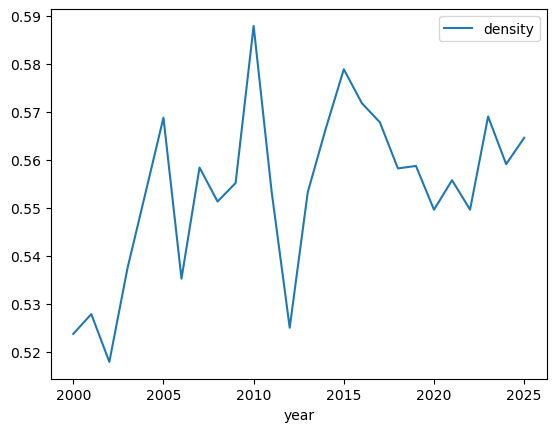

In [20]:
ogDf.plot(x='year', y='density', kind='line')

In [4]:
import pandas as pd

In [5]:
newDf = pd.read_csv('data\heatmapDataWithState.csv')

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Ricky\AppData\Local\Temp\ipykernel_14664\4053059012.py:1: SyntaxWarning: invalid escape sequence '\h'
  newDf = pd.read_csv('data\heatmapDataWithState.csv')


In [21]:
Data2000 = newDf.query('year==2000')
Data2024 = newDf.query('year==2024')

Data2000_2024 = Data2024.merge(Data2000, on = ['x', 'y'])
Data2000_2024

,year_x,x,y,mean_evi_x,state_x,year_y,mean_evi_y,state_y
0,2024,304,199,0.717557,AL,2000,0.725191,AL
1,2024,304,200,0.770992,AL,2000,0.740458,AL
2,2024,304,201,0.679389,AL,2000,0.679389,AL
3,2024,304,202,0.732824,AL,2000,0.679389,AL
4,2024,304,203,0.694656,AL,2000,0.625954,AL
...,...,...,...,...,...,...,...,...
69717,2024,176,105,0.374046,WY,2000,0.381679,WY
69718,2024,176,106,0.358779,WY,2000,0.389313,WY
69719,2024,176,107,0.412214,WY,2000,0.343511,WY
69720,2024,176,108,0.312977,WY,2000,0.374046,WY


In [22]:
Data2000_2024['diff_mean_evi'] = Data2000_2024['mean_evi_x'] - Data2000_2024['mean_evi_y']
Data2000_2024

,year_x,x,y,mean_evi_x,state_x,year_y,mean_evi_y,state_y,diff_mean_evi
0,2024,304,199,0.717557,AL,2000,0.725191,AL,-0.007634
1,2024,304,200,0.770992,AL,2000,0.740458,AL,0.030534
2,2024,304,201,0.679389,AL,2000,0.679389,AL,0.000000
3,2024,304,202,0.732824,AL,2000,0.679389,AL,0.053435
4,2024,304,203,0.694656,AL,2000,0.625954,AL,0.068702
...,...,...,...,...,...,...,...,...,...
69717,2024,176,105,0.374046,WY,2000,0.381679,WY,-0.007634
69718,2024,176,106,0.358779,WY,2000,0.389313,WY,-0.030534
69719,2024,176,107,0.412214,WY,2000,0.343511,WY,0.068702
69720,2024,176,108,0.312977,WY,2000,0.374046,WY,-0.061069
